#### Decision Tree Classification 
is one the  basics and most powerfull method of classification

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X = load_iris().data
y = load_iris().target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

clf = DecisionTreeClassifier(max_depth=16, random_state=1)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

acc = accuracy_score(y_test, pred)
print(f"Accuracy: {acc}")


# Hyperparam tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': range(1, 10, 1),
    'min_samples_leaf': range(1, 20, 2),
    'min_samples_split': range(2, 20, 2),
    'criterion': ['entropy', 'gini']
}

tree = DecisionTreeClassifier(random_state=1)
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, y_train)
print(f"best accuracy: {grid_search.best_score_}")
print(grid_search.best_estimator_)

Accuracy: 0.9555555555555556
Fitting 5 folds for each of 1620 candidates, totalling 8100 fits
best accuracy: 0.9714285714285715
DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=3,
                       random_state=1)


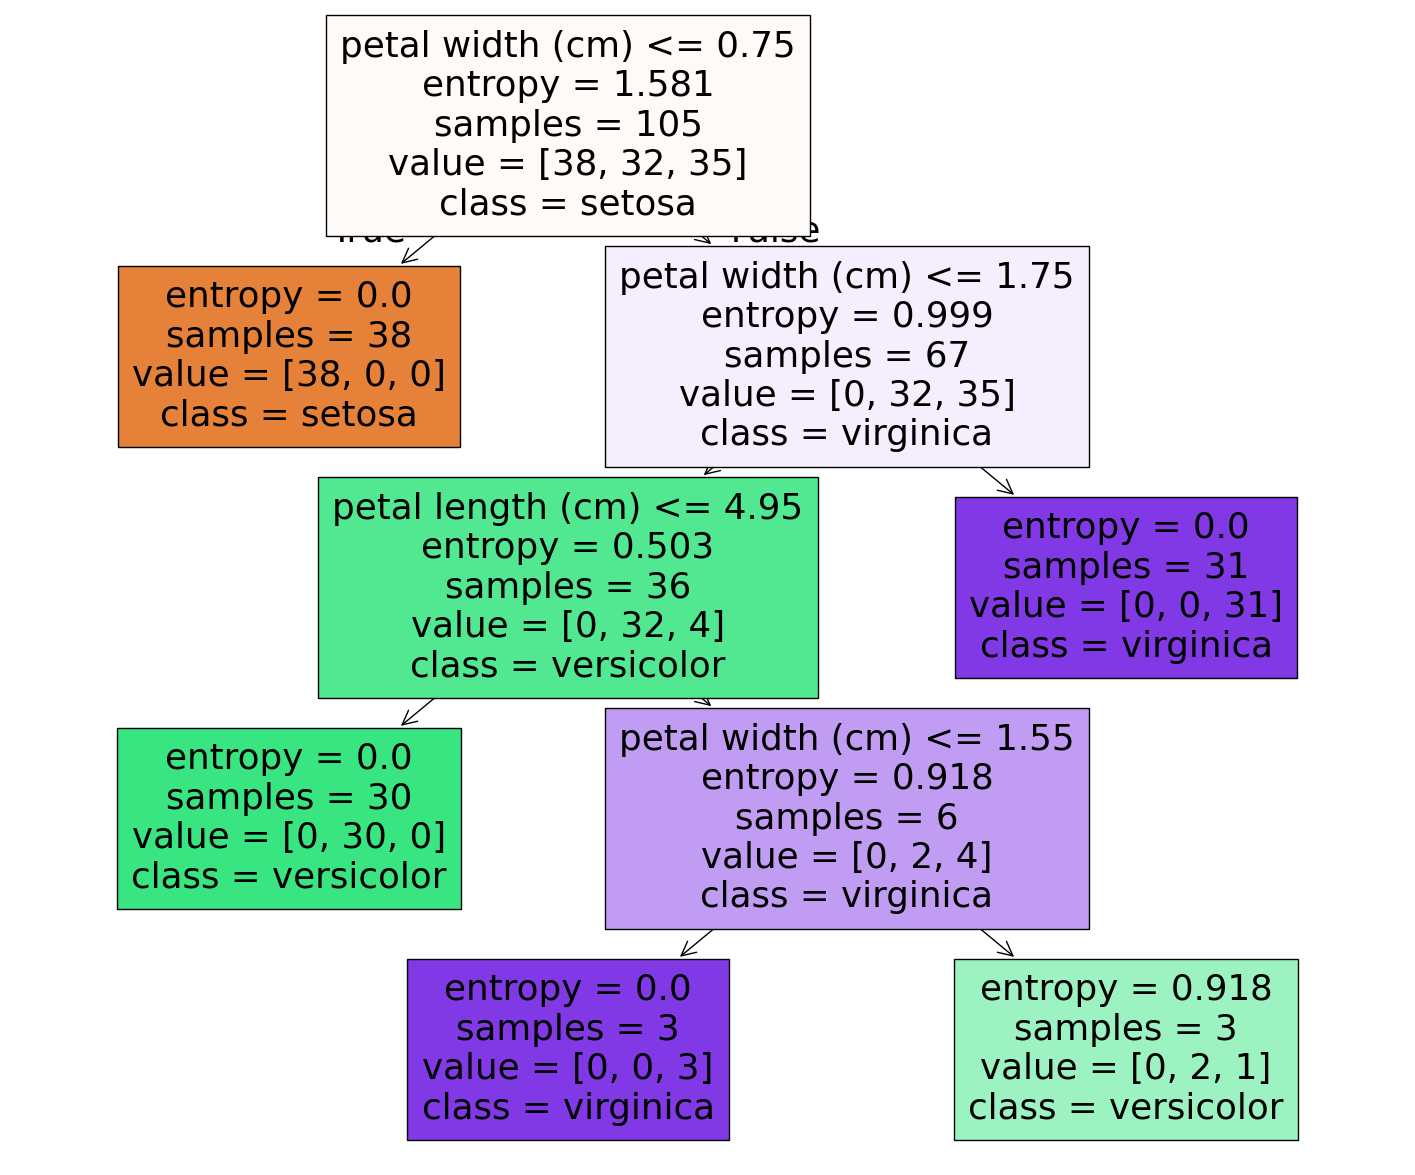

In [9]:
# Plotting the tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

tree_clf = grid_search.best_estimator_
plt.figure(figsize=(18,15))
plot_tree(tree_clf, filled=True, feature_names=load_iris().feature_names, class_names=load_iris().target_names)
plt.show()